In [1]:
# load the raw dataset
import numpy as np
import pandas as pd
from pandas import DataFrame

rawdf = pd.read_csv("unc.edu_PANCAN_IlluminaHiSeq_RNASeqV2.geneExp.tsv", sep="\t", index_col=0)
rawdf.head()

,TCGA-OR-A5J1-01A-11R-A29S-07,TCGA-OR-A5J2-01A-11R-A29S-07,TCGA-OR-A5J3-01A-11R-A29S-07,TCGA-OR-A5J5-01A-11R-A29S-07,TCGA-OR-A5J6-01A-31R-A29S-07,TCGA-OR-A5J7-01A-11R-A29S-07,TCGA-OR-A5J8-01A-11R-A29S-07,TCGA-OR-A5J9-01A-11R-A29S-07,TCGA-OR-A5JA-01A-11R-A29S-07,TCGA-OR-A5JB-01A-11R-A29S-07,...,TCGA-VQ-AA6A-01A-11R-A414-31,TCGA-VQ-AA6B-01A-11R-A414-31,TCGA-VQ-AA6D-01A-11R-A414-31,TCGA-VQ-AA6F-01A-31R-A414-31,TCGA-VQ-AA6G-01A-11R-A414-31,TCGA-VQ-AA6I-01A-11R-A414-31,TCGA-VQ-AA6J-01A-11R-A414-31,TCGA-VQ-AA6K-01A-11R-A414-31,TCGA-ZA-A8F6-01A-23R-A36D-31,TCGA-ZQ-A9CR-01A-11R-A39E-31
0.0gene_id,,,,,,,,,,,,,,,,,,,,,
?|100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.3189,0.0000,0.0000,0.0000,0.0000,0.2466,0.4134,0.0000,0.5668
?|100133144,3.2661,2.6815,1.7301,0.0000,0.0000,1.1673,1.4422,0.0000,4.4556,7.1293,...,26.1744,28.1937,32.4153,18.6091,33.7625,35.0189,27.6770,28.6855,29.3939,19.8016
?|100134869,3.9385,8.9948,6.5650,1.5492,4.4709,6.0529,2.2876,1.3599,5.0581,0.0000,...,14.3662,16.5156,21.5482,17.2753,20.2653,30.1605,19.2494,21.1378,15.4703,8.5379
?|10357,149.1350,81.0777,86.4879,53.9117,66.9063,103.5060,94.9316,78.1955,69.2389,155.7090,...,11.5541,10.0447,15.9546,21.9117,8.4115,21.6463,35.6665,11.5371,22.0386,29.3701
?|10431,2034.1000,1304.9300,1054.6600,2350.8900,1257.9900,1866.4300,995.0270,1762.1200,1213.5300,2005.5700,...,357.7860,780.6260,903.2380,1033.0300,733.7430,519.9930,709.6430,702.4730,561.9840,1874.0200


In [2]:
# transpose raw dataset so row is patient samples and column is list of genes
processeddf = rawdf.transpose()

In [3]:
# check to see if the dataset has any missing values
processeddf.isnull().any().any()

False

In [4]:
# check if the any row( i.e. sample) has all zero values so we can delete them
removed_all_zero_rows_df = processeddf.loc[(processeddf!=0).any(axis=1),:]
removed_all_zero_rows_df.shape
# answer is no; all 10471 samples have values; proceed to next

(10471, 20531)

In [5]:
# check to see if any duplicate rows/samples
processeddf.index.get_duplicates()

[]

In [6]:
# check to see if any duplicate columns/features
processeddf.transpose().index.get_duplicates()

[]

In [7]:
# create the data label file

# step 1: load tissue source site file
dfSampleSource = pd.read_csv("tissueSourceSite.tsv", sep="\t", keep_default_na=False, na_values=[])

# step 2: load disease study information file
dfSampleAbb = pd.read_csv("diseaseStudy.tsv", sep="\t",keep_default_na=False, na_values=[])

dfSampleAbb = dfSampleAbb.reset_index()



# step 3: add "study abbreviation" on disease study file to tissue source sit file 
dfSampleSourceAddOn = dfSampleSource.merge(dfSampleAbb[['Study Name', 'Study Abbreviation']], on=['Study Name'])

# step 4: create a new file (i.e. dflabels) for class labels
dflabels = DataFrame(columns = ['labels'], index = processeddf.index)

for i, row in processeddf.iterrows():
    for diseaseType in dfSampleSourceAddOn['TSS Code']:
        if(i[5:7] == diseaseType):
            dflabels.loc[i] = dfSampleSourceAddOn.loc[dfSampleSourceAddOn['TSS Code'] == diseaseType, 'Study Abbreviation'].iloc[0]

# step 5: check to see if dflabels file is all filled with tumor type
dflabels.isnull().any().any()

False

In [8]:
# count # of samples per class
from collections import Counter
print (Counter(dflabels['labels']))

Counter({'BRCA': 1218, 'KIRC': 606, 'LUAD': 576, 'THCA': 572, 'HNSC': 566, 'LUSC': 554, 'PRAD': 550, 'LGG': 534, 'SKCM': 474, 'STAD': 450, 'BLCA': 427, 'LIHC': 424, 'COAD': 329, 'KIRP': 323, 'CESC': 310, 'OV': 309, 'SARC': 265, 'UCEC': 201, 'ESCA': 196, 'PCPG': 187, 'PAAD': 183, 'GBM': 174, 'LAML': 173, 'TGCT': 156, 'THYM': 122, 'READ': 105, 'KICH': 91, 'MESO': 87, 'UVM': 80, 'ACC': 79, 'UCS': 57, 'DLBC': 48, 'CHOL': 45})


In [9]:
# count total # of classes
len(Counter(dflabels['labels']))

33

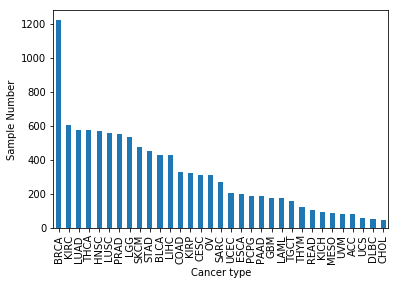

In [10]:
# plot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame

dflabels['labels'].value_counts().plot(kind='bar')
plt.xlabel('Cancer type')
plt.ylabel('Sample Number')

plt.show()

In [33]:
# 18 experiments data
import numpy as np
import pandas as pd
from pandas import DataFrame
d = {'normalization method': ['min-max','standardization','standardization','standardization','standardization','min-max','standardization','standardization','standardization','min-max','standardization','min-max','standardization','min-max','standardization','min-max','standardization','standardization','standardization','standardization','min-max'],
     'feature selection method':['tree classifier','tree classifier','variance threshold','variance threshold','variance threshold','tree classifier', 'tree classifier','variance threshold','variance threshold','tree classifier','tree classifier','variance threshold','variance threshold','tree classifier','tree classifier','variance threshold','variance threshold','variance threshold','variance threshold','variance threshold','variance threshold'],
     'over-sample/under-sampling method':[10471,10471,10471,45,300,10471,10471,10471, 300,10471,10471,10471,300,10471,10471,10471,45,300,300,45,10471],
      'algorithm':['DT','DT','DT','DT','DT','kNN','kNN','kNN','kNN','linear\nSVM','linear\nSVM','linear\nSVM','linear\nSVM','poly\nSVM','poly\nSVM','poly\nSVM','poly\nSVM','poly\nSVM', 'ANN','ANN','ANN'],
     'accuracy score':[0.89069,0.88592,0.87399,0.71717,0.92222,0.83914,0.84487,0.8358,0.86313,0.93461,0.91265,0.93556,0.95808,0.90835,0.90024,0.89642,0.82492,0.94545,0.92727,0.89899,0.89737],
    'ave. presicion':[0.89,0.89,0.87,0.74,0.92,0.84,0.84,0.83,0.88,0.94,0.93,0.94,0.96,0.91,0.9,0.9,0.86,0.95,0.93,0.90,0.91],
    'ave. recall':[0.89,0.89,0.87,0.72,0.92,0.84,0.84,0.84,0.86,0.93,0.91,0.94,0.96,0.91,0.9,0.9,0.82,0.95,0.93,0.90,0.90],
    'ave. F1-score':[0.89,0.89,0.87,0.72,0.92,0.83,0.84,0.83,0.86,0.94,0.91,0.94,0.96,0.91,0.9,0.9,0.83,0.95,0.93,0.90,0.90],
    'training time (seconds)':[446.811,673.724,281.546,42.344,394.191,7.662,10.57,23.3501,20.402,210.075,162.819,895.098,335.808,117.767,84.059,138.951,9.181,87.082,404.46067,39.04796,541.07605]}

df = DataFrame(data=d)
df

,accuracy score,algorithm,ave. F1-score,ave. presicion,ave. recall,feature selection method,normalization method,over-sample/under-sampling method,training time (seconds)
0,0.89069,DT,0.89,0.89,0.89,tree classifier,min-max,10471,446.81100
1,0.88592,DT,0.89,0.89,0.89,tree classifier,standardization,10471,673.72400
2,0.87399,DT,0.87,0.87,0.87,variance threshold,standardization,10471,281.54600
3,0.71717,DT,0.72,0.74,0.72,variance threshold,standardization,45,42.34400
4,0.92222,DT,0.92,0.92,0.92,variance threshold,standardization,300,394.19100
5,0.83914,kNN,0.83,0.84,0.84,tree classifier,min-max,10471,7.66200
6,0.84487,kNN,0.84,0.84,0.84,tree classifier,standardization,10471,10.57000
7,0.83580,kNN,0.83,0.83,0.84,variance threshold,standardization,10471,23.35010
8,0.86313,kNN,0.86,0.88,0.86,variance threshold,standardization,300,20.40200
9,0.93461,linear\nSVM,0.94,0.94,0.93,tree classifier,min-max,10471,210.07500


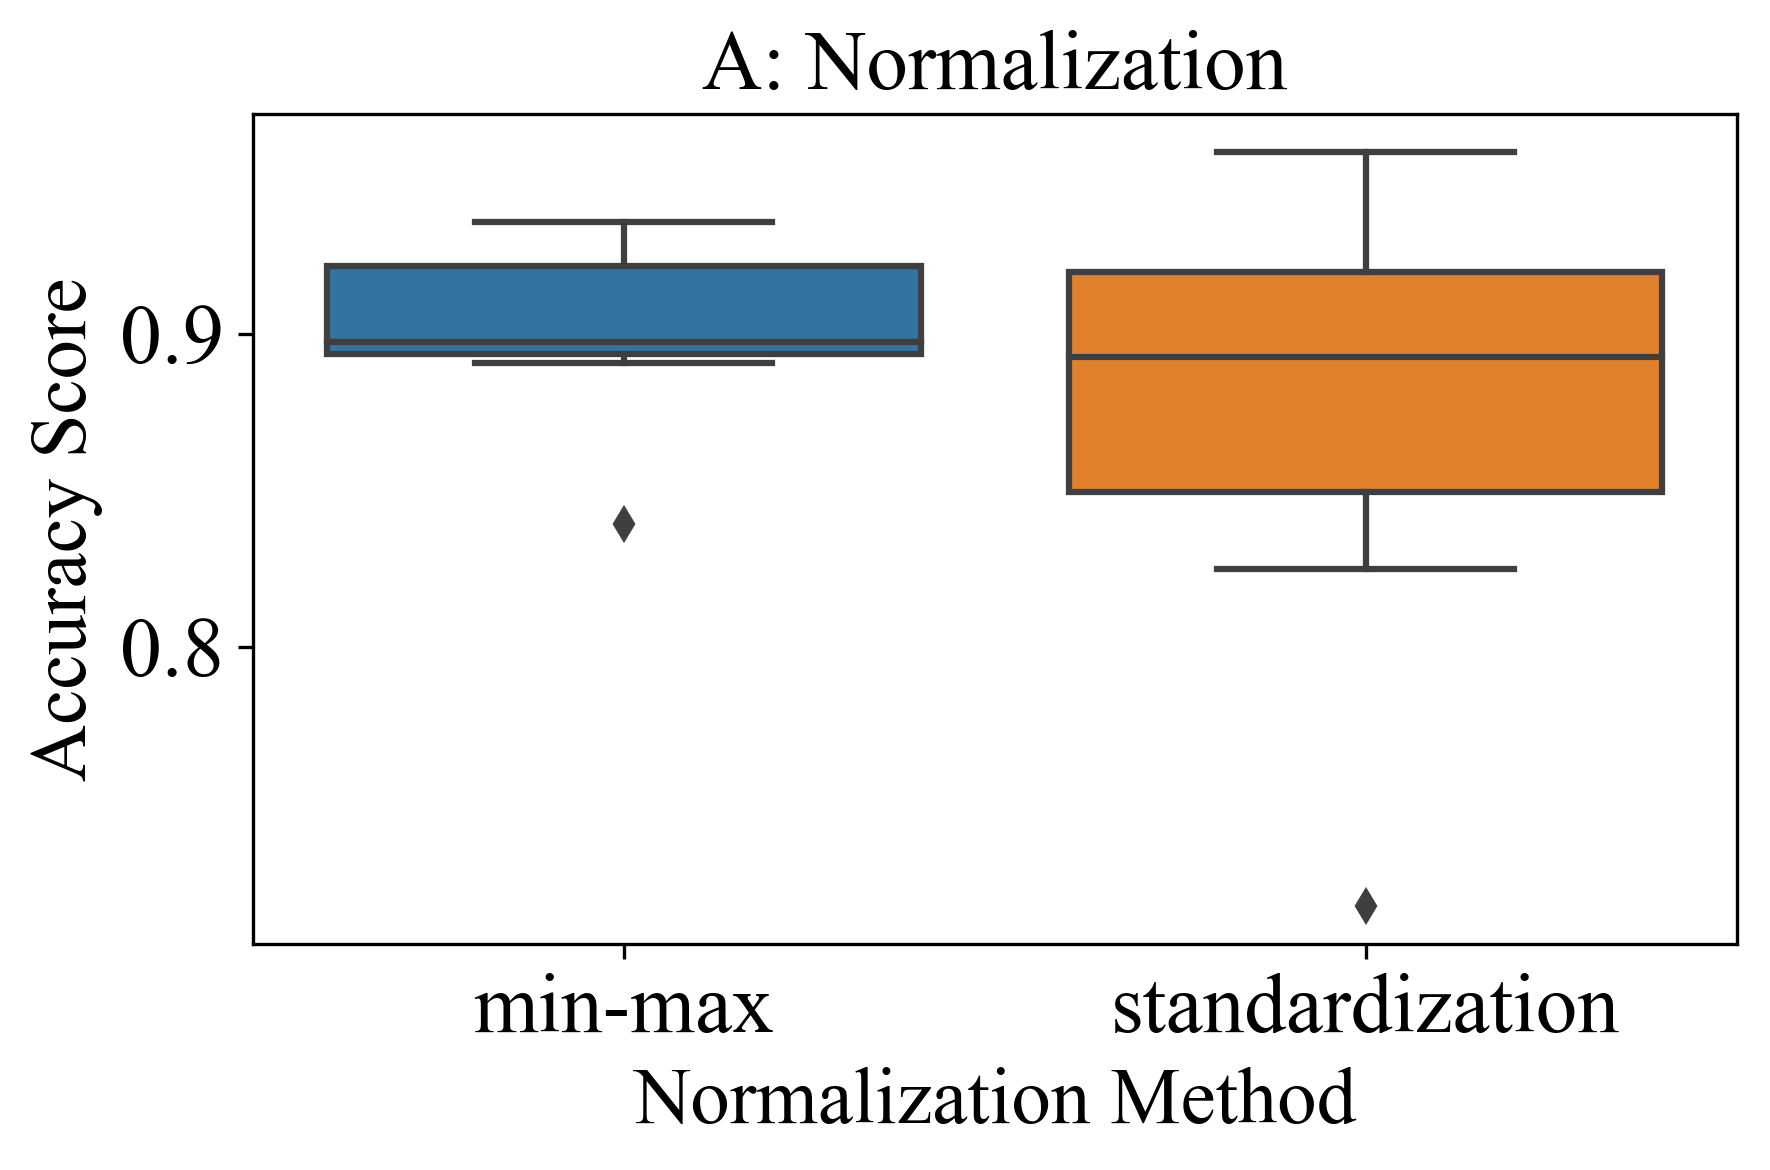

In [34]:
# norm
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from io import BytesIO

plt.figure(dpi=300)

sns.set_style({'font.family': 'Times New Roman'})
ax = sns.boxplot(x="normalization method", y="accuracy score",data=df)
ax.axes.set_title("A: Normalization",fontsize=20, family ="Times New Roman")
ax.set_xlabel("Normalization Method",fontsize=19, family ="Times New Roman")
ax.set_ylabel("Accuracy Score",fontsize=19, family ="Times New Roman")
ax.tick_params(labelsize=20)
plt.tight_layout()
plt.savefig('normcomparison.tiff', dpi=300)


png1 = BytesIO()
plt.savefig(png1, format='png')
png2 = Image.open(png1)
png2.save('normcomparison.tiff')
png1.close()


plt.show()


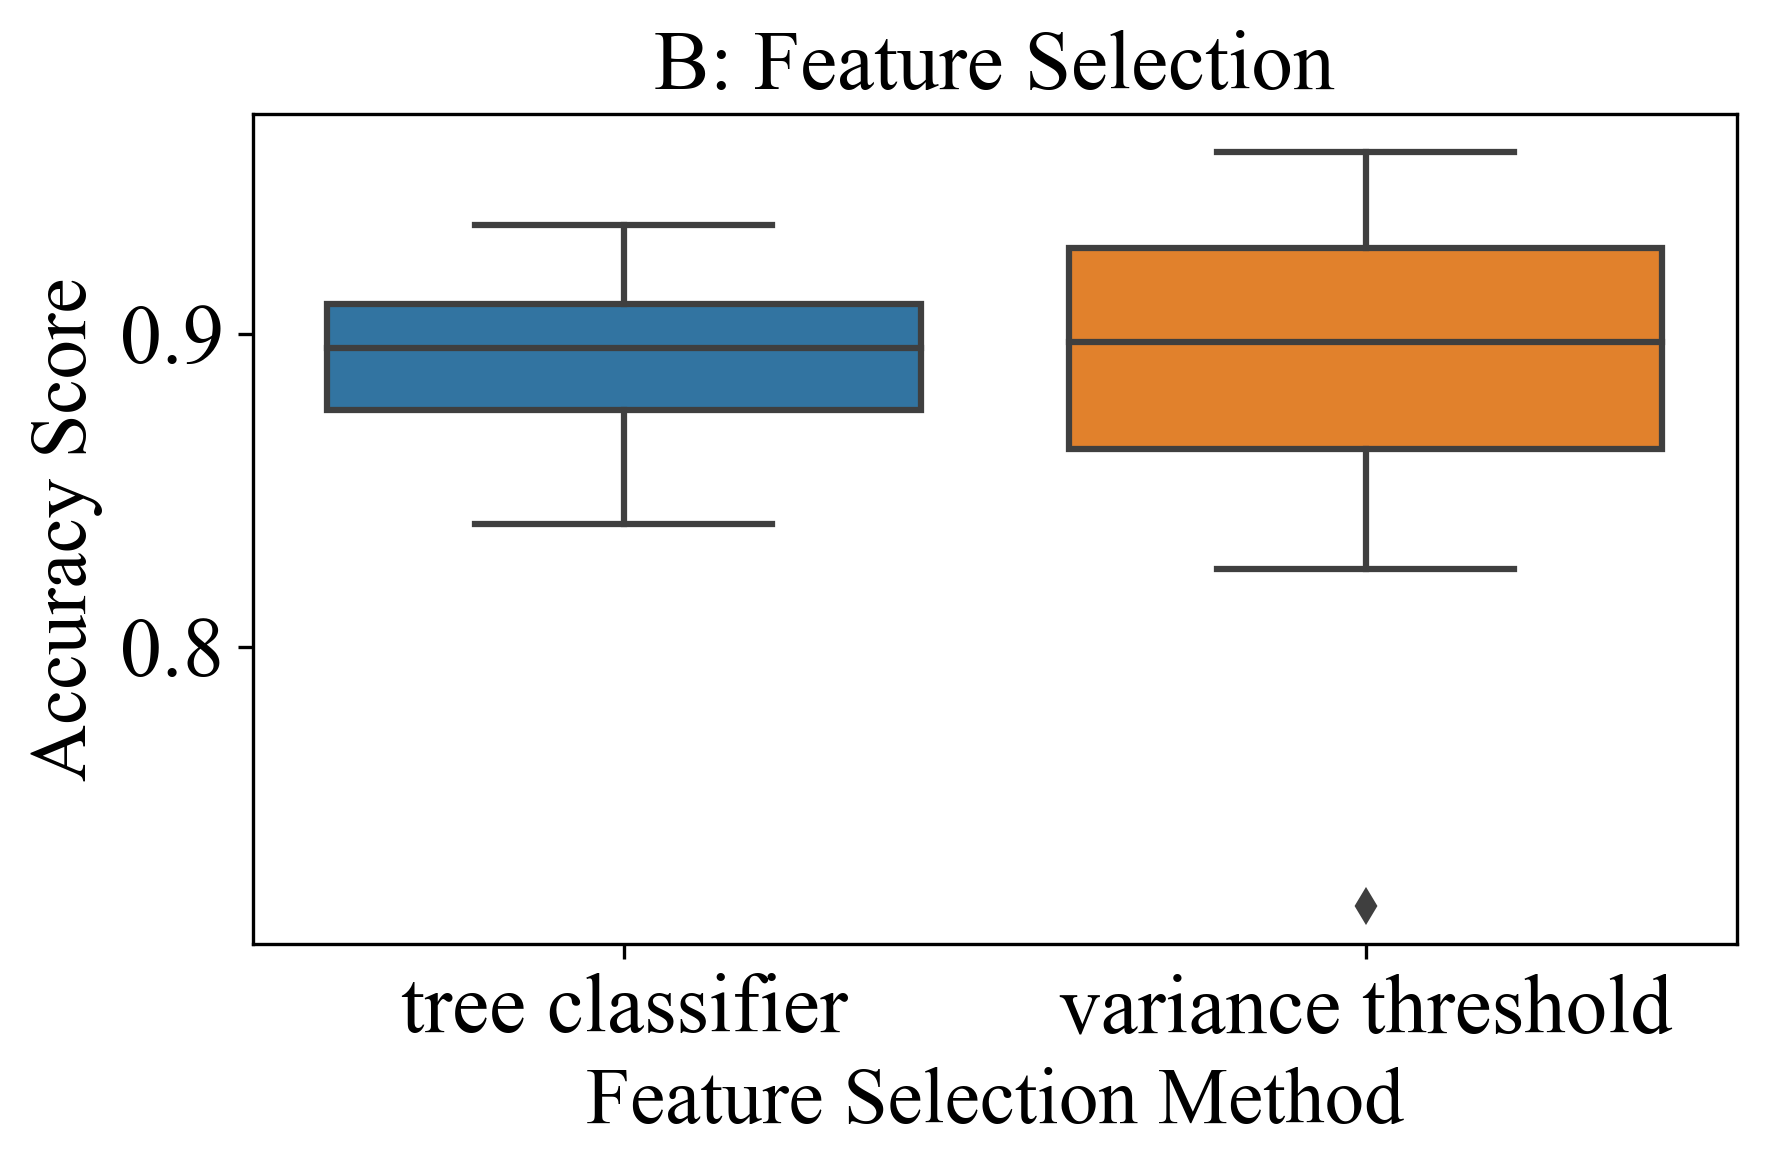

In [35]:
# feature selection
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from io import BytesIO

plt.figure(dpi=300)

sns.set_style({'font.family': 'Times New Roman'})
ax = sns.boxplot(x="feature selection method", y="accuracy score",data=df)
ax.axes.set_title("B: Feature Selection",fontsize=20, family ="Times New Roman")
ax.set_xlabel("Feature Selection Method",fontsize=19, family ="Times New Roman")
ax.set_ylabel("Accuracy Score",fontsize=19, family ="Times New Roman")
ax.tick_params(labelsize=20)
plt.tight_layout()
plt.savefig('featureselectioncomparison.tiff', dpi=300)


png1 = BytesIO()
plt.savefig(png1, format='png')
png2 = Image.open(png1)
png2.save('featureselectioncomparison.tiff')
png1.close()

plt.show()


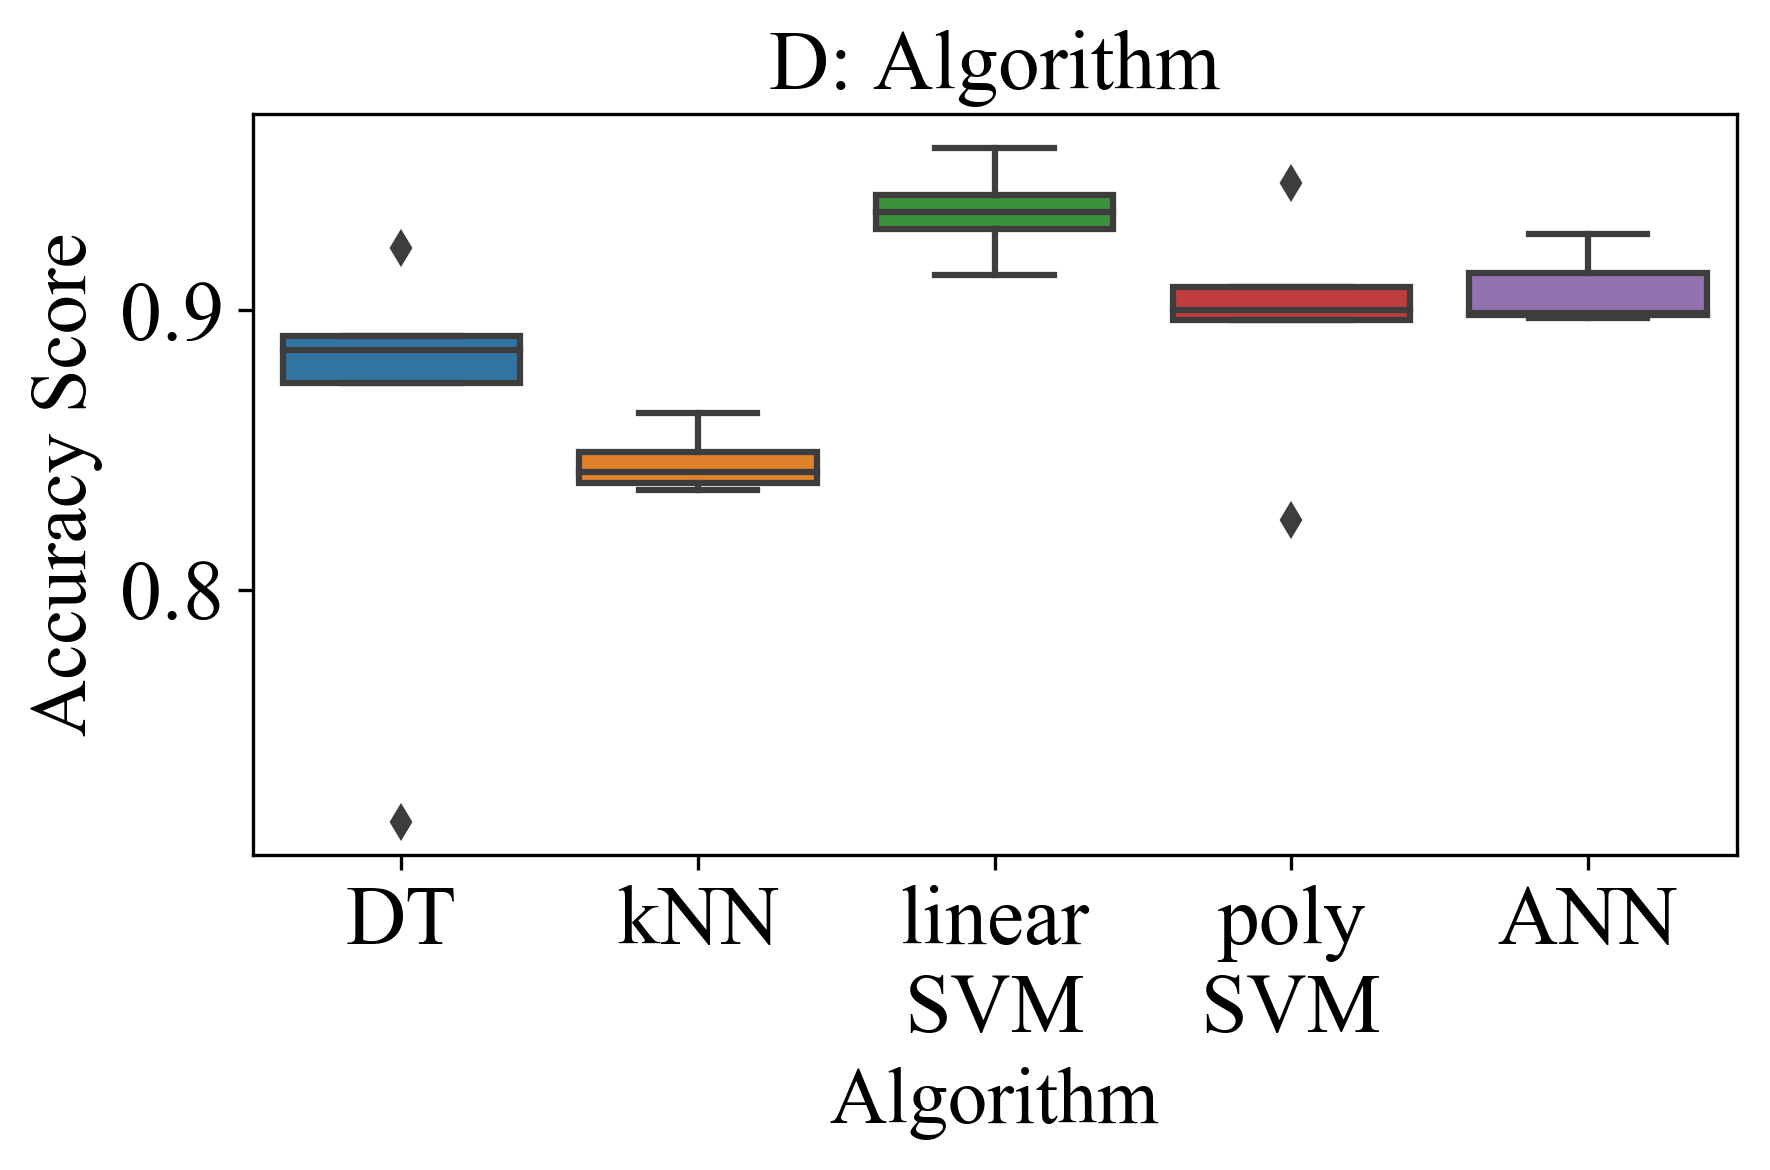

In [36]:
# algorithm
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


from PIL import Image
from io import BytesIO

plt.figure(dpi=300)

sns.set_style({'font.family': 'Times New Roman'})
ax = sns.boxplot(x="algorithm", y="accuracy score",data=df)
ax.axes.set_title("D: Algorithm",fontsize=20, family ="Times New Roman")
ax.set_xlabel("Algorithm",fontsize=19, family ="Times New Roman")
ax.set_ylabel("Accuracy Score",fontsize=19, family ="Times New Roman")
ax.tick_params(labelsize=20)
plt.tight_layout()
plt.savefig('algorithmcomparison.tiff', dpi=300)

png1 = BytesIO()
plt.savefig(png1, format='png')
png2 = Image.open(png1)
png2.save('algorithmcomparison.tiff')
png1.close()


plt.show()


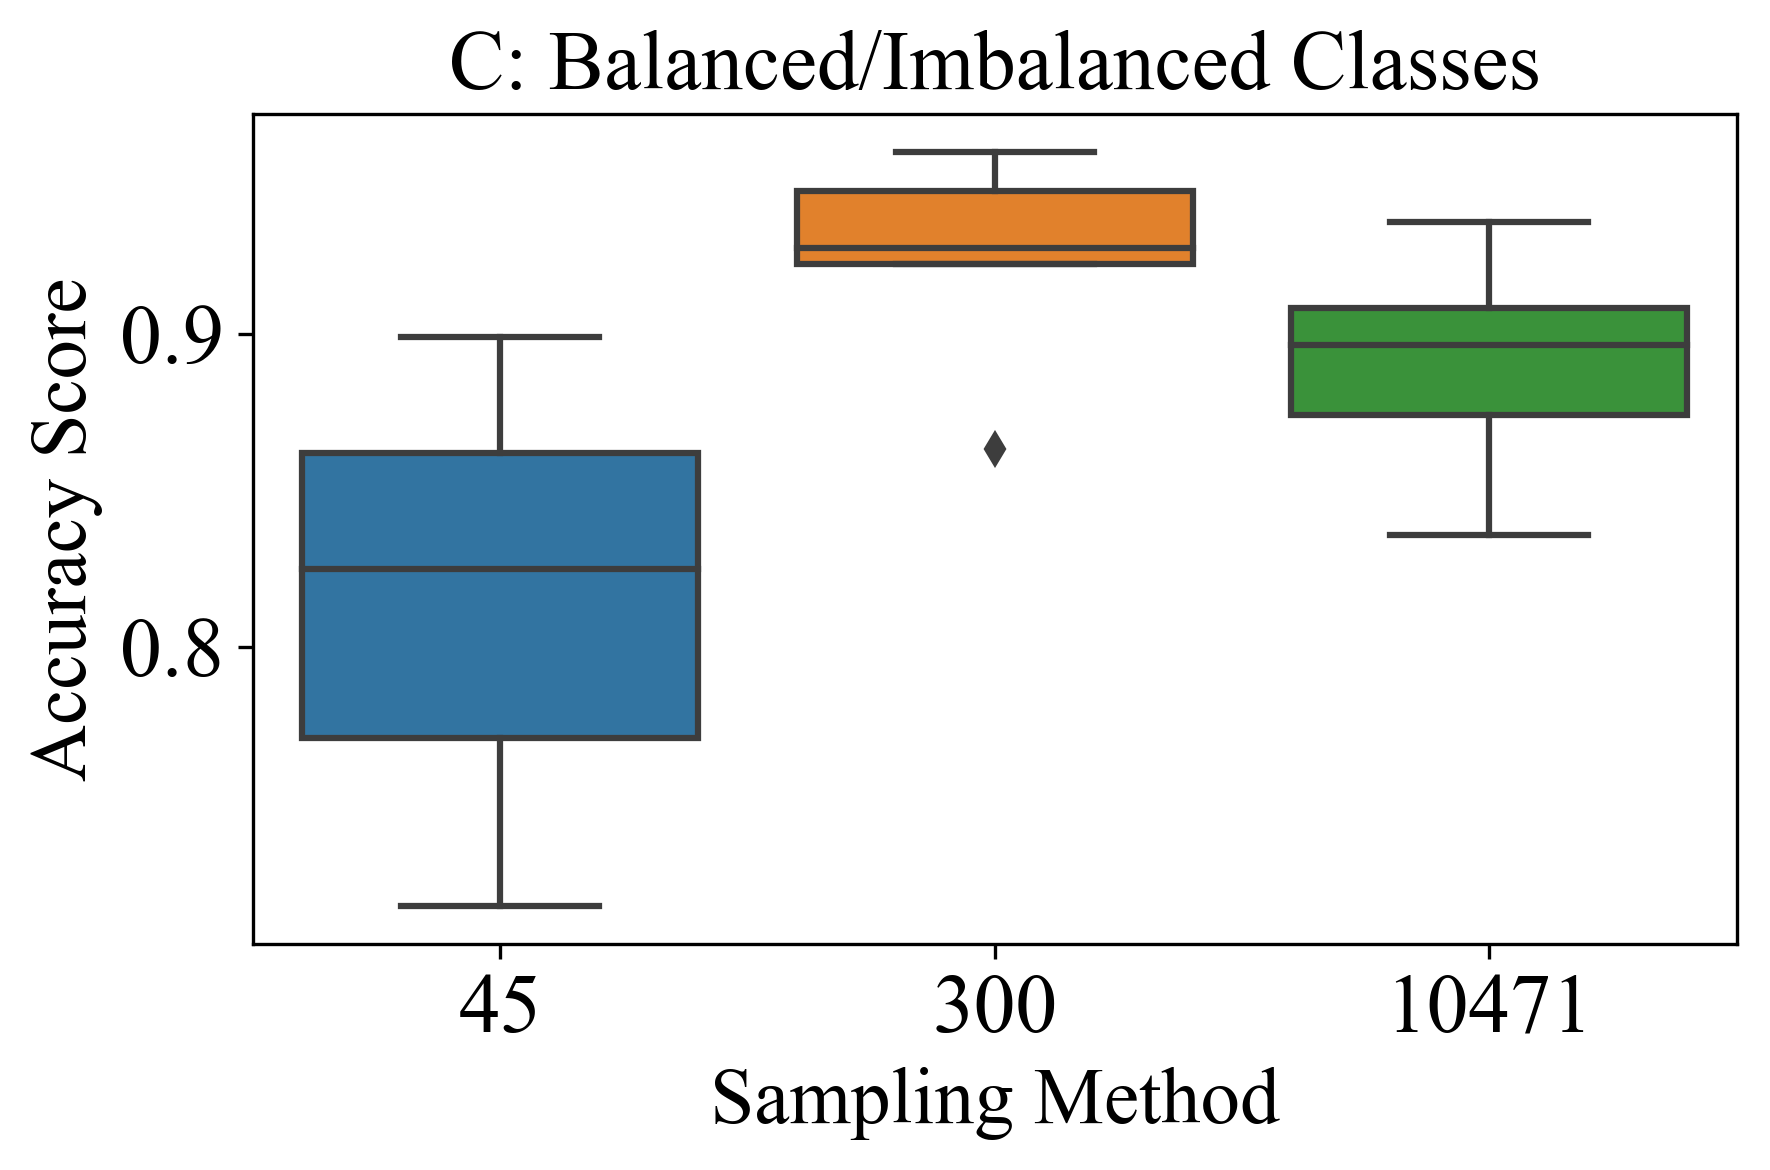

In [37]:
# balanced vs imbalanced
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from io import BytesIO

plt.figure(dpi=300)

sns.set_style({'font.family': 'Times New Roman'})
ax = sns.boxplot(x="over-sample/under-sampling method", y="accuracy score",data=df)
ax.axes.set_title("C: Balanced/Imbalanced Classes",fontsize=20, family ="Times New Roman")
ax.set_xlabel("Sampling Method",fontsize=19, family ="Times New Roman")
ax.set_ylabel("Accuracy Score",fontsize=19, family ="Times New Roman")
ax.tick_params(labelsize=20)
plt.tight_layout()
plt.savefig('balancedclassescomparison.tiff', dpi=300)

png1 = BytesIO()
plt.savefig(png1, format='png')
png2 = Image.open(png1)
png2.save('balancedclassescomparison.tiff')
png1.close()


plt.show()

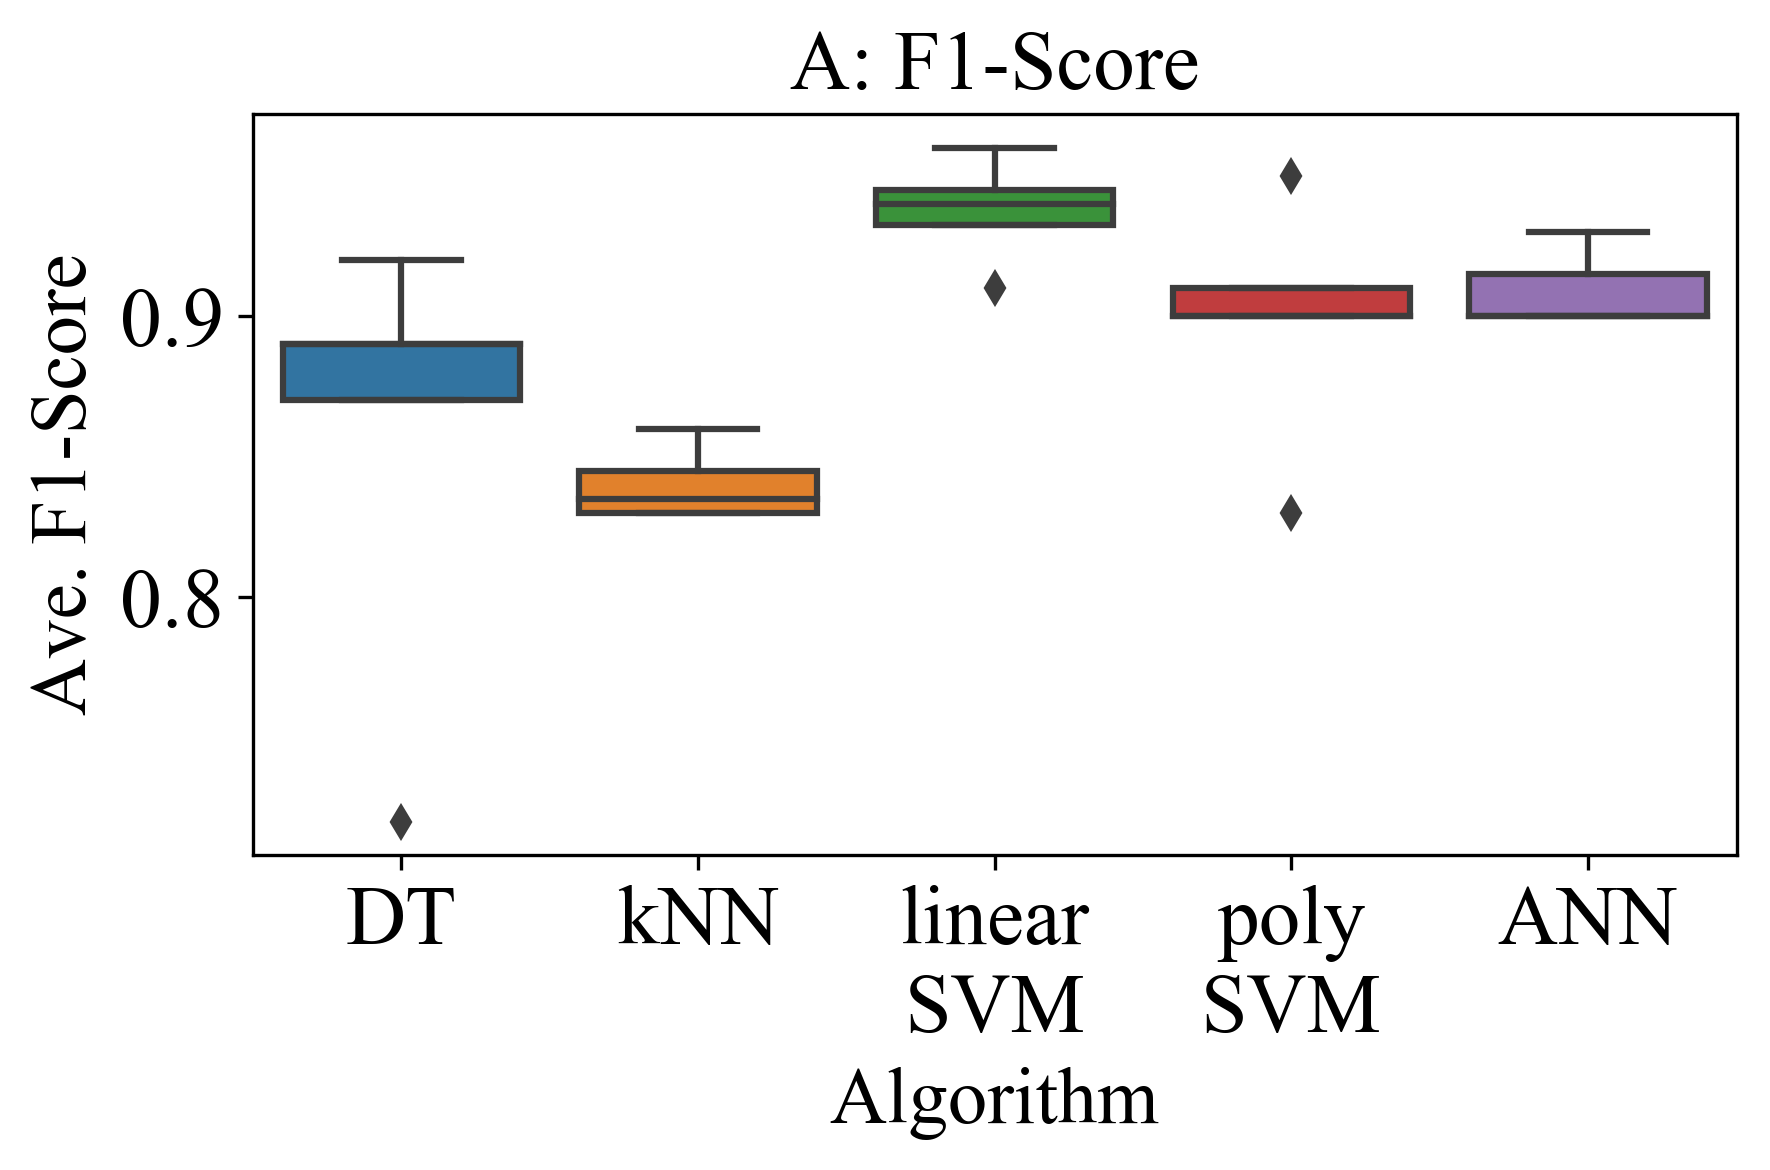

In [38]:
# f1 and model
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from io import BytesIO

plt.figure(dpi=300)

sns.set_style({'font.family': 'Times New Roman'})
ax = sns.boxplot(x="algorithm", y="ave. F1-score",data=df)
ax.axes.set_title("A: F1-Score",fontsize=20, family ="Times New Roman")
ax.set_xlabel("Algorithm",fontsize=19, family ="Times New Roman")
ax.set_ylabel("Ave. F1-Score",fontsize=19, family ="Times New Roman")
ax.tick_params(labelsize=20)
plt.tight_layout()
plt.savefig('flandmodelcomparison.tiff', dpi=300)

png1 = BytesIO()
plt.savefig(png1, format='png')
png2 = Image.open(png1)
png2.save('flandmodelcomparison.tiff')
png1.close()



plt.show()

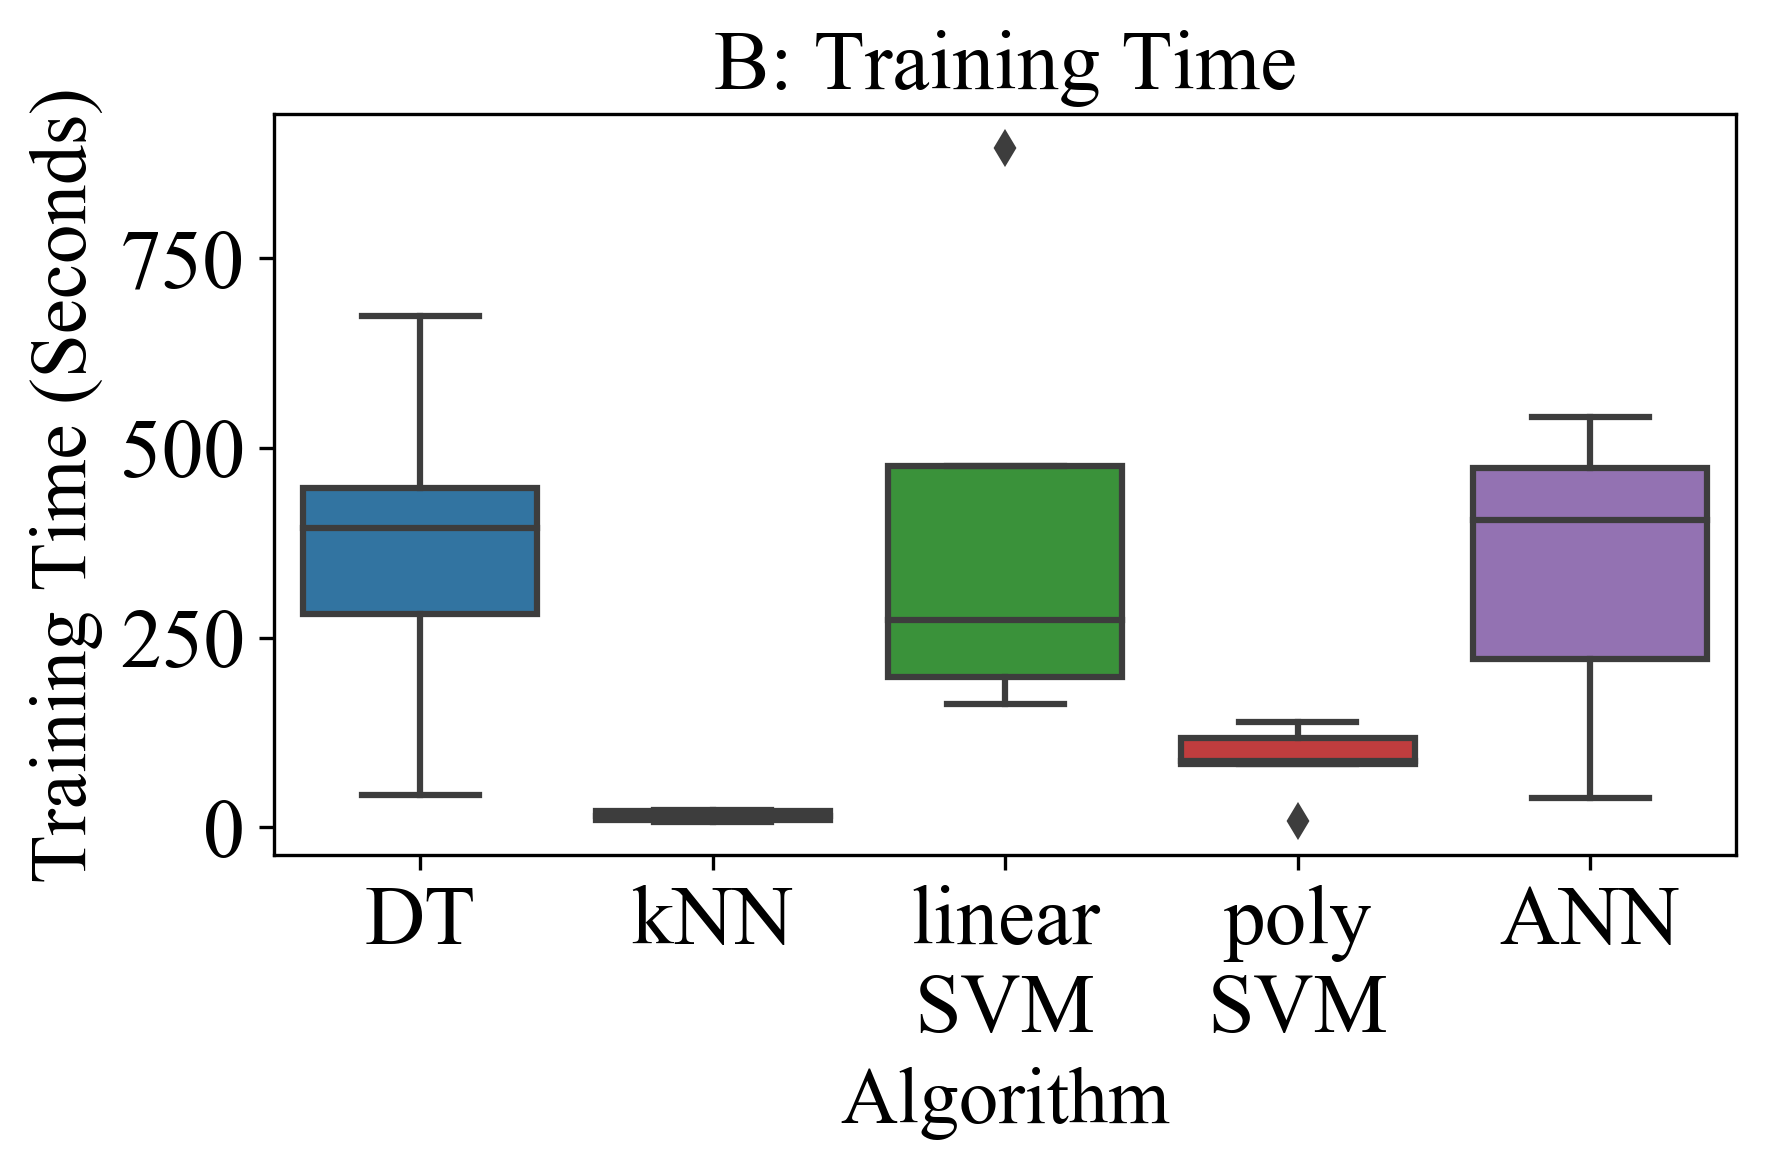

In [39]:
# training time and model
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from io import BytesIO

plt.figure(dpi=300)


sns.set_style({'font.family': 'Times New Roman'})
ax = sns.boxplot(x="algorithm", y="training time (seconds)",data=df)
ax.axes.set_title("B: Training Time",fontsize=20, family ="Times New Roman")
ax.set_xlabel("Algorithm",fontsize=19, family ="Times New Roman")
ax.set_ylabel("Training Time (Seconds)",fontsize=19, family ="Times New Roman")
ax.tick_params(labelsize=20)
plt.tight_layout()
plt.savefig('trainingandmodelcomparison.tiff', dpi=300)


png1 = BytesIO()
plt.savefig(png1, format='png')
png2 = Image.open(png1)
png2.save('trainingandmodelcomparison.tiff')
png1.close()

plt.show()



